In [1]:
from acquisition import *

In [2]:
#чтение данных из файла на хосте СЕРВЕРА
acq = acquisition('2266.acquisition')

File '2266.acquisition' readed successfully!


In [8]:
acq.columns()

TypeError: columns() takes at least 2 arguments (1 given)

In [3]:
#загрузка данных из файла на хосте КЛИЕНТА
acc = acquisition()

## part1. MISE EN TEMPERATURE:

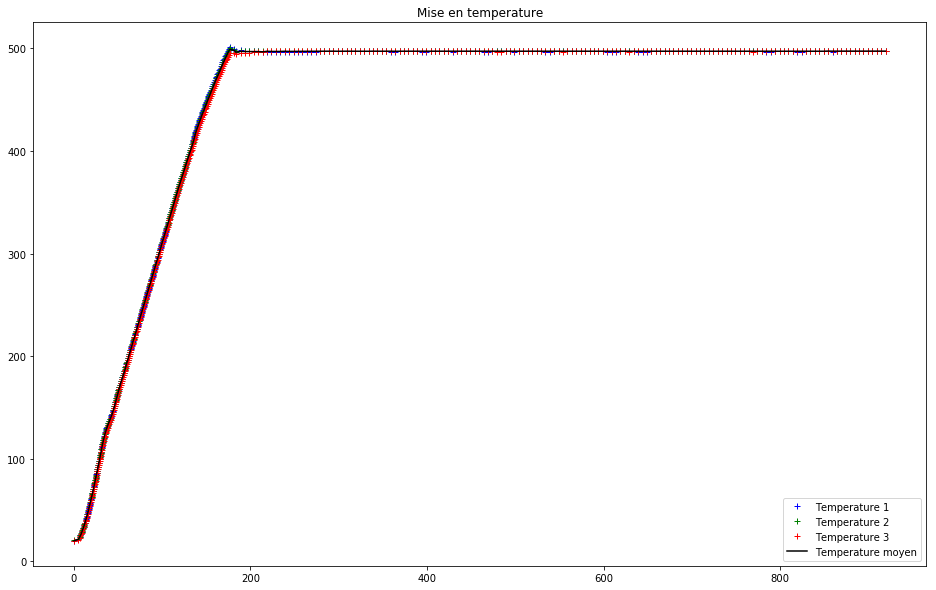

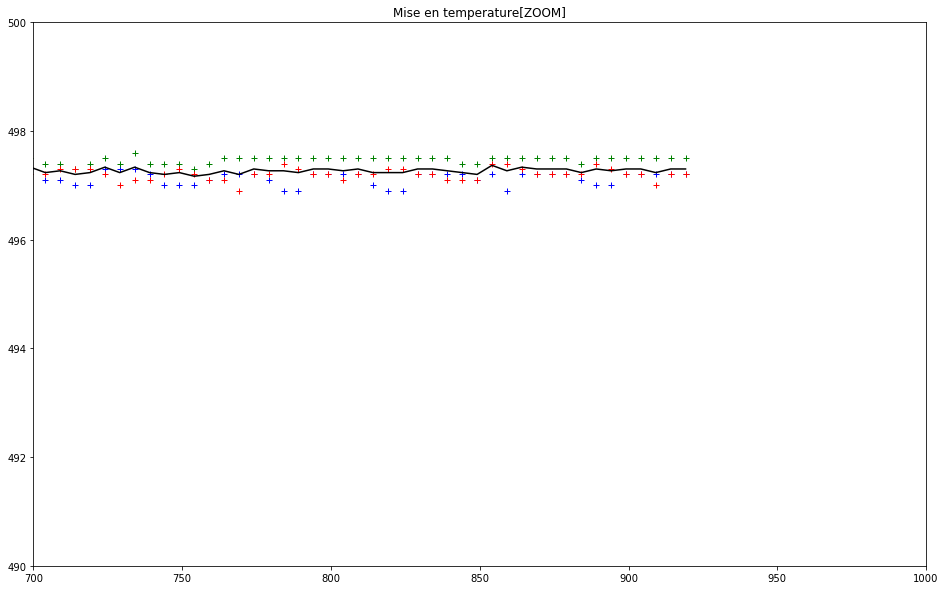

In [4]:
%matplotlib inline
plt.rcParams["figure.figsize"]=[16., 10.]
acq.chauffage_temperature()

## part2. MISE EN CHARGE:

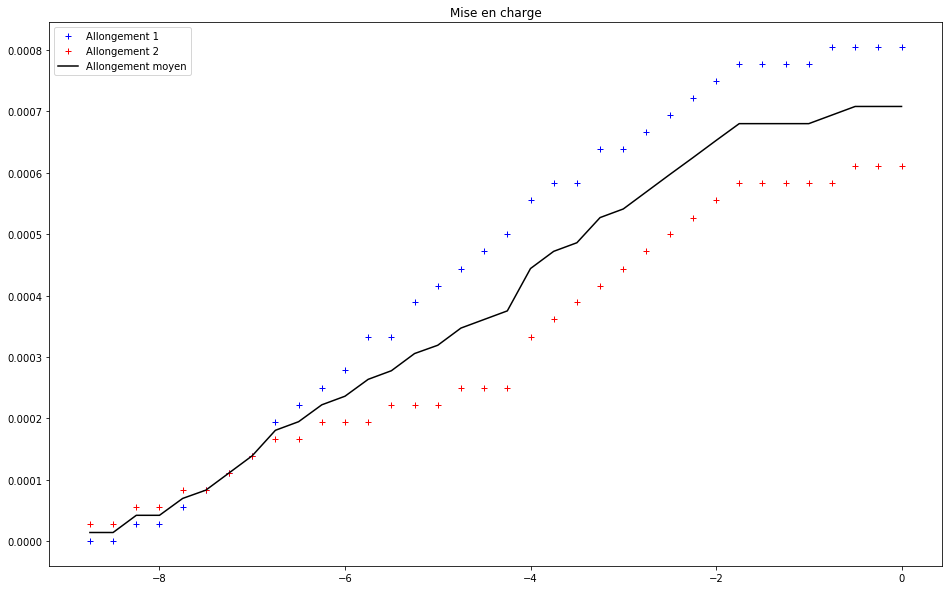

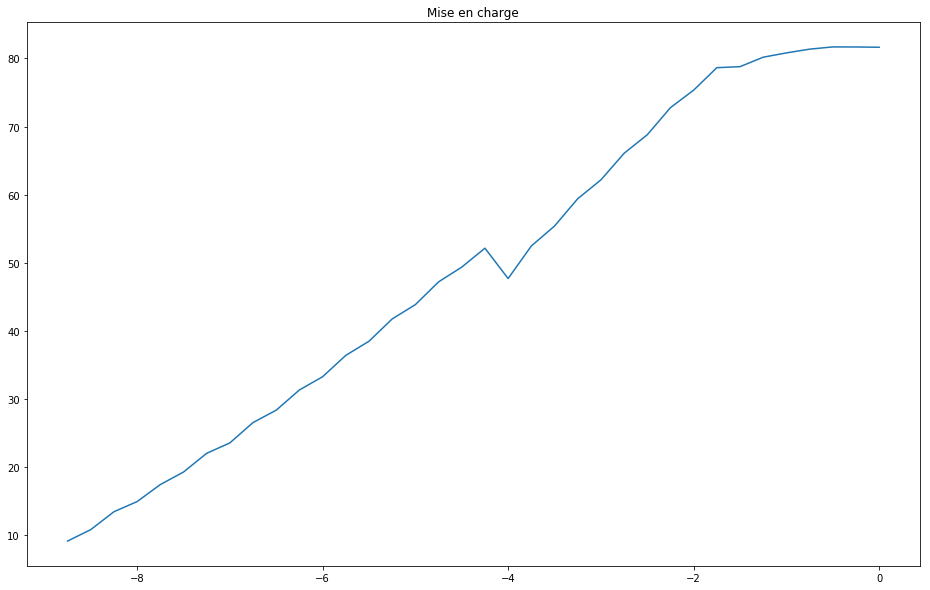

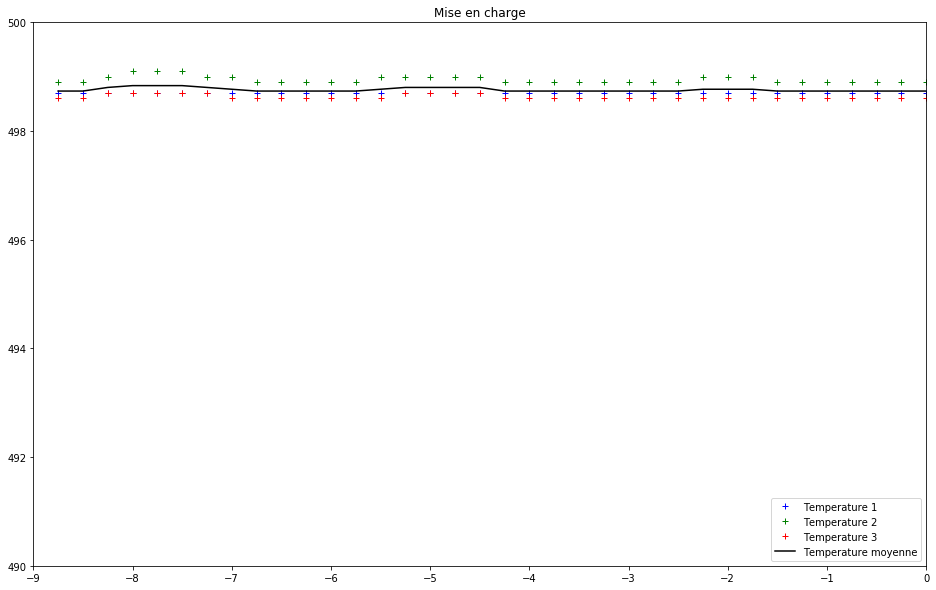

In [9]:
acq.charge_allongement()
acq.charge_contrainte()
acq.charge_temperature()

## part3. FLUAGE:

In [ ]:
acq.fluage_allongement()

In [ ]:
acq.fluage_allongement_moy()

In [ ]:
acq.fluage_temperature()

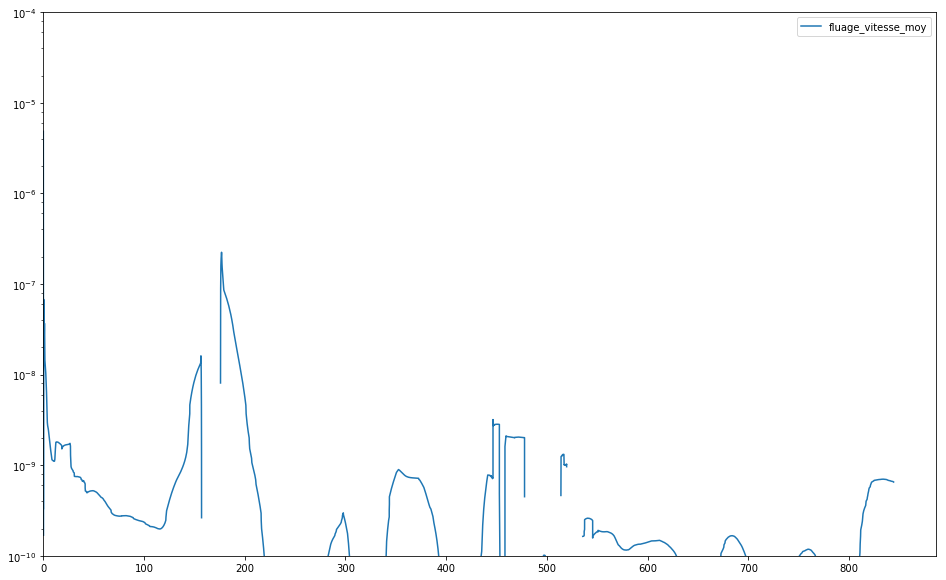

In [3]:
acq.fluage_vitesse_moy()

### 2_fluage_vitesse_moy.png            5        (6+7)/200        vitesse de fluage (???) + filter + dy/dx
**sandbox**

In [9]:
from acquisition import *
acq = acquisition('2266.acquisition')

File '2266.acquisition' readed successfully!


<IPython.core.display.Javascript object>


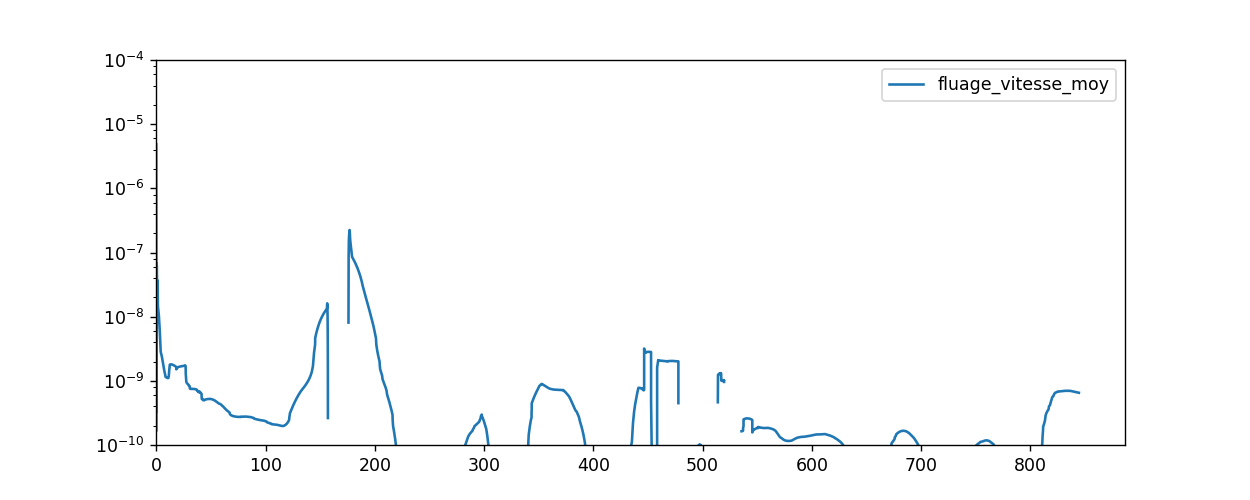

In [10]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=[10., 4.]

X,Y1,Y2,Y9 = acq.columns("FLUAGE", 3,4,5,9)
irup = np.argmax(Y9)
if irup==0: irup = len(Y9)
lid = np.array(xrange(irup))
lissage_v = 0
#autoliss = 2*int(0.01*lid.size)+1 if lissage_v == 0 else lissage_v
autoliss = 2*int(0.01*irup)+1 if lissage_v == 0 else lissage_v
Y= 0.005*(Y1[lid]+Y2[lid])
Ys = savitzky_golay(Y,autoliss,1,0,1)

dY, step, cutoff = [], 10, 0
for _ii in range(step+cutoff,Ys.size):
    dY.append((Ys[_ii] - Ys[_ii-step]) / (X[_ii] - X[_ii-step]) / 3600.) 

dY_s = np.append([np.nan]*step, savitzky_golay(dY, autoliss, 1, 0, 1))
    
plt.semilogy(X[lid],dY_s[lid],label='fluage_vitesse_moy')
plt.axis([X[0], X[-1] * 1.05, 10**(-10), 10**(-4)])
plt.legend()
plt.show()